<a href="https://colab.research.google.com/github/bahgat-ahmed/Data-Science-Machine-Learning-and-NLP-Practice-Notebooks/blob/main/4%20-%20Clustering/K-means%20Clustering/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

In K-Means clustering we're actually creating a new dependent variable where the values will be the clusters themselves. So we are creating a dependent variable from the given features or (independent variables).

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


As we see, the Cutomer ID is unique to each customer. Therefore, it is an irrelevant feature that will introduce unnecessary noise in the dependent variable we are creating. So we don't want to include it as a feature that would help in clustering so just exlude it.

The rest of the columns (features) in the dataset seems reasonable and relevant for identifying clusters in the data. However, we will only take the last two columns for visualizing the clusters on a nice 2D plot. After this, I will implement the same process on all the 4 relevant columns to mimic the real-life process.

## Using 2 Features

In [3]:
# include only the last two columns for 2D visualization
X = dataset.iloc[:, [3, 4]].values
print(X[:10, :])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


### Feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
print(X[:10, :])

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]]


### Using the elbow method to find the optimal number of clusters

Avoid random initialization trap by using **k-means++** algorithm.

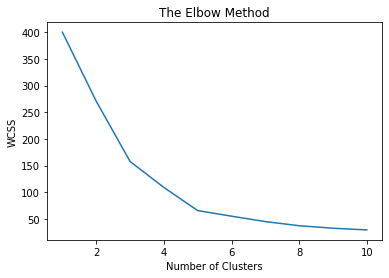

In [6]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    # avoid random initialization trap by using 'k-means++' algorithm
    kmeans = KMeans(n_clusters=i,  init='k-means++', random_state=0).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')   
plt.show() 

### Training the K-Means model on the dataset

From the previous graph, 5 clusters are the optimal number of clusters.

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(X)
# get the depedent variable that is created by training the k-means algorithm
y_kmeans = kmeans.predict(X)

In [8]:
print(y_kmeans)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


### Visualising the clusters

In [9]:
# return X values to their original values before feature scaling
X = sc.inverse_transform(X)

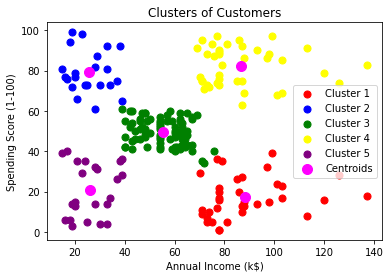

In [10]:
# plot clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red',
            label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue',
            label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green',
            label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='yellow',
            label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c='Purple',
            label='Cluster 5')
# get clusters' centroids then return their values to the original scale
clusters_centers = sc.inverse_transform(kmeans.cluster_centers_)
# plot clusters' centroids
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], s=100,
            c='magenta', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')  
plt.legend() 
plt.show() 

#### Insights

1. Leave cluster 5, cluster 3 and cluster 4 customers as they are with the same targeting since they are spending in harmony with their annual income.
2. Target more cluster 1 customers by increase ads for instance since they have high annual income, but are not spending much in the mall.
3. Decrease targeting, ads, and offers for cluster 2 for ethical reasons since they seem to spend more than they afford. So decreasing targeting them will help decrease their finanical burden. Since the offers that are irresistable for these customers might not be as important for them as other crucial things in life that they should spend more money on.

## Using 4 Features

In [11]:
X = dataset.iloc[:, 1:].values

In [12]:
print(X[:10, :])

[['Male' 19 15 39]
 ['Male' 21 15 81]
 ['Female' 20 16 6]
 ['Female' 23 16 77]
 ['Female' 31 17 40]
 ['Female' 22 17 76]
 ['Female' 35 18 6]
 ['Female' 23 18 94]
 ['Male' 64 19 3]
 ['Female' 30 19 72]]


### One hot encoding the categorical feature

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# remainder='passthrough' is used for keeping the other columns that weren't
# one-hot encoded, and [0] is the column that we want to one-hot encode
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
print(X[:10, :])

[[0.0 1.0 19 15 39]
 [0.0 1.0 21 15 81]
 [1.0 0.0 20 16 6]
 [1.0 0.0 23 16 77]
 [1.0 0.0 31 17 40]
 [1.0 0.0 22 17 76]
 [1.0 0.0 35 18 6]
 [1.0 0.0 23 18 94]
 [0.0 1.0 64 19 3]
 [1.0 0.0 30 19 72]]


### Feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
print(X[:10, :])

[[-1.12815215  1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215  1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [ 0.88640526 -0.88640526 -1.20926872 -1.66266033  1.00159627]
 [ 0.88640526 -0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [ 0.88640526 -0.88640526 -1.13750203 -1.62449091  1.70038436]
 [-1.12815215  1.12815215  1.80493225 -1.58632148 -1.83237767]
 [ 0.88640526 -0.88640526 -0.6351352  -1.58632148  0.84631002]]


### Using the elbow method to find the optimal number of clusters

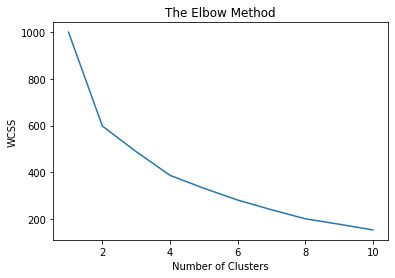

In [17]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    # avoid random initialization trap by using 'k-means++' algorithm
    kmeans = KMeans(n_clusters=i,  init='k-means++', random_state=0).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')   
plt.show() 

### Training the K-Means model on the dataset

From the previous graph, 5 clusters are the optimal number of clusters.

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(X)
# get the depedent variable that is created by training the k-means algorithm
y_kmeans = kmeans.predict(X)

In [19]:
print(y_kmeans)

[0 0 1 4 4 4 1 4 3 4 3 4 1 4 3 0 1 0 3 4 3 0 1 0 1 0 1 0 1 4 3 4 3 0 1 4 1
 4 1 4 1 0 3 4 1 4 1 4 4 4 1 0 4 3 1 3 1 3 4 3 3 0 1 1 3 0 1 1 0 4 3 1 1 1
 3 0 1 0 4 1 3 0 3 1 4 3 1 4 4 1 1 0 3 1 4 0 1 4 3 0 4 1 3 0 3 4 1 3 3 3 3
 4 1 0 4 4 1 1 1 1 0 1 4 0 4 4 2 0 3 0 2 0 4 4 2 4 1 0 2 4 1 0 4 4 2 0 2 4
 1 0 2 0 1 4 1 4 2 4 2 4 1 4 2 4 2 4 2 4 1 0 2 0 2 0 1 4 2 0 2 0 1 4 2 4 1
 0 1 0 1 4 1 4 2 4 1 4 1 0 2 0]
